In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm

from scikitplot.metrics import plot_roc, plot_precision_recall
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve, roc_curve, auc, roc_auc_score
from mlxtend.plotting import plot_decision_regions

plt.style.use("seaborn-white")
warnings.filterwarnings('ignore')

## Problem 1

In [2]:
X, y = make_classification(n_samples = 2000, n_features = 2,
                           n_redundant = 0, 
                           n_informative = 1,
                           n_clusters_per_class = 1,
                           random_state = 3,
                           class_sep = 2,
                           flip_y = 0.1,
                           n_classes = 2)

In [3]:
data = pd.DataFrame(data = np.c_[X, y])
data.columns = np.array(["A", "B", "Response"])
data.Response = pd.to_numeric(data.Response, downcast = "signed")
data.head()

,A,B,Response
0,-1.653148,-2.036685,0
1,-0.458612,-2.095498,0
2,1.486651,-1.888864,0
3,-0.241126,-2.040498,0
4,-2.249821,2.571902,1


In [4]:
y = data.Response
X = data.drop(["Response"], axis = 1)

In [5]:
X.shape, y.shape

((2000, 2), (2000,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1600, 2)
X_test shape: (400, 2)
y_train shape: (1600,)
y_test shape: (400,)


In [7]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_model_score = logreg_model.score(X_test, y_test)

print("Logistic Regression model score:", logreg_model_score)

Logistic Regression model score: 0.945


In [8]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
lda_model_score = lda_model.score(X_test, y_test)

print("LDA model score:", lda_model_score)

LDA model score: 0.945


In [9]:
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
qda_model_score = qda_model.score(X_test, y_test)

print("QDA model score:", qda_model_score)

QDA model score: 0.945


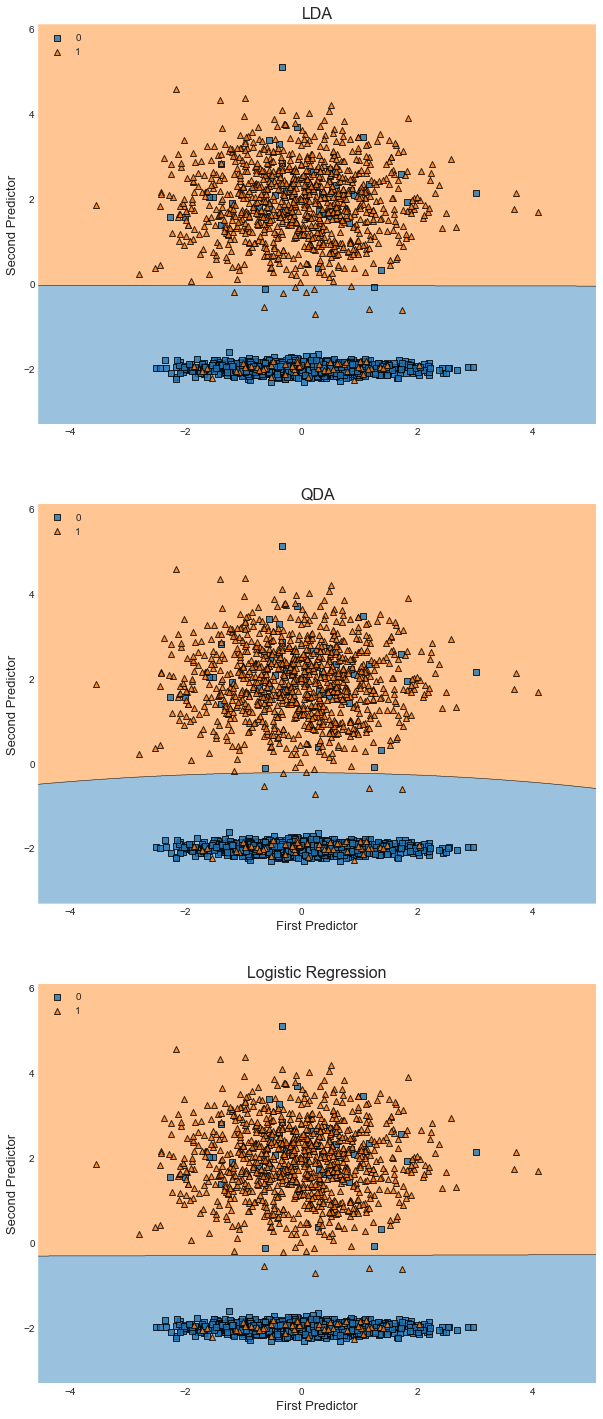

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (10, 25))

ax1 = plot_decision_regions(np.array(X), np.array(y), clf = lda_model, legend = 2, ax = ax1)
ax2.set_xlabel("First Predictor", fontsize = 13)
ax1.set_ylabel("Second Predictor", fontsize = 13)
ax1.set_title("LDA", fontsize = 16)
ax2 = plot_decision_regions(np.array(X), np.array(y), clf = qda_model, legend = 2, ax = ax2)
ax2.set_title("QDA", fontsize = 16)
ax2.set_xlabel("First Predictor", fontsize = 13)
ax2.set_ylabel("Second Predictor", fontsize = 13)
ax3 = plot_decision_regions(np.array(X), np.array(y), clf = logreg_model, legend = 2, ax = ax3)
ax3.set_title("Logistic Regression", fontsize = 16)
ax3.set_xlabel("First Predictor", fontsize = 13)
ax3.set_ylabel("Second Predictor", fontsize = 13)

plt.show()

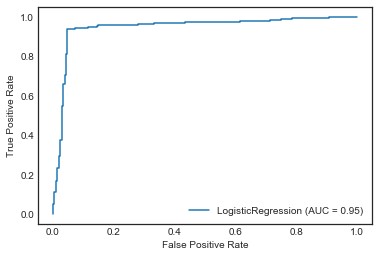

In [11]:
logreg_disp = plot_roc_curve(logreg_model, X_test, y_test)
plt.show()

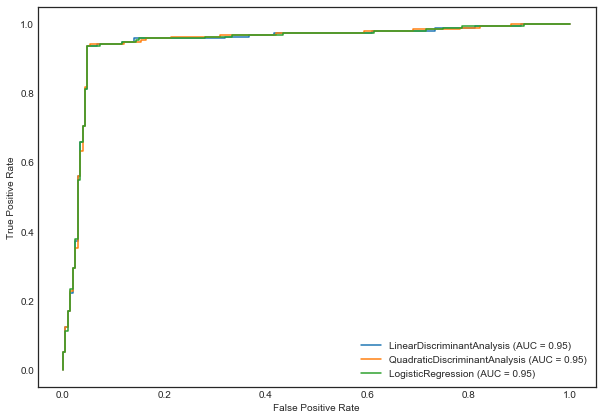

In [12]:
fig = plt.figure(figsize = (10, 7))
ax = plt.gca()
lda_disp = plot_roc_curve(lda_model, X_test, y_test, ax = ax)
qda_disp = plot_roc_curve(qda_model, X_test, y_test, ax = ax)
logreg_disp.plot(ax = ax)
plt.show()

In [13]:
logreg_proba = logreg_model.predict_proba(X_test)
lda_proba = lda_model.predict_proba(X_test)
qda_proba = qda_model.predict_proba(X_test)

fpr_log, tpr_log, threshold_log = roc_curve(y_test, logreg_proba[:, 1], pos_label = 1)
fpr_lda, tpr_lda, threshold_lda = roc_curve(y_test, lda_proba[:, 1], pos_label = 1)
fpr_qda, tpr_qda, threshold_qda = roc_curve(y_test, qda_proba[:, 1], pos_label = 1)

auc_logreg = auc(fpr_log, tpr_log)
auc_lda = auc(fpr_lda, tpr_lda)
auc_qda = auc(fpr_qda, tpr_qda)

auc_logreg, auc_lda, auc_qda

(0.9463843207929714, 0.9461340141673551, 0.9467347500688343)

### Logistic Regression PR Curve

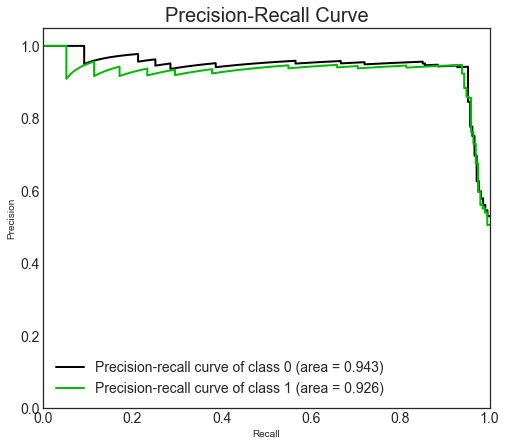

In [14]:
plot_precision_recall(y_test, logreg_proba, figsize = (8, 7), title_fontsize = 20, text_fontsize = 14, plot_micro = False)
plt.show()

### LDA PR curve

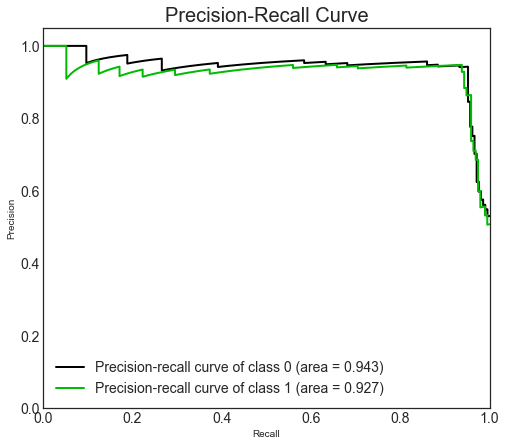

In [15]:
plot_precision_recall(y_test, lda_proba, figsize = (8, 7), title_fontsize = 20, text_fontsize = 14, plot_micro = False)
plt.show()

### QDA PR Curve

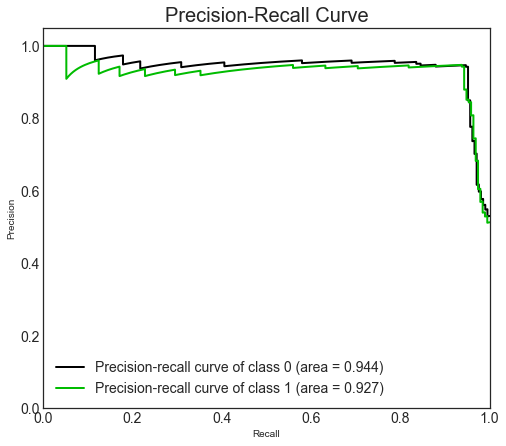

In [16]:
plot_precision_recall(y_test, qda_proba, figsize = (8, 7), title_fontsize = 20, text_fontsize = 14, plot_micro = False)
plt.show()

## Problem 2

In [17]:
X, y = make_classification(n_samples = 2000, n_features = 2,
                           n_redundant=0,
                           n_informative=2,
                           n_clusters_per_class=1,
                           random_state=3,
                           class_sep=3,
                           flip_y=0.1,
                           n_classes=3)

In [18]:
data_2 = pd.DataFrame(data = np.c_[X, y])
data_2.columns = np.array(["A", "B", "Response"])
data_2.Response = pd.to_numeric(data_2.Response, downcast = "signed")
data_2.head()

,A,B,Response
0,-3.336990,-3.404892,2
1,-2.877038,-2.773751,2
2,2.968147,-2.958021,1
3,6.125041,2.930907,1
4,2.730844,2.071666,0


In [19]:
X = data_2.drop(["Response"], axis = 1)
y = data_2.Response

X.shape, y.shape

((2000, 2), (2000,))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1600, 2)
X_test shape: (400, 2)
y_train shape: (1600,)
y_test shape: (400,)


In [21]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_model.score(X_test, y_test)

0.9175

In [22]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
lda_model.score(X_test, y_test)

0.9175

In [23]:
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
qda_model.score(X_test, y_test)

0.9175

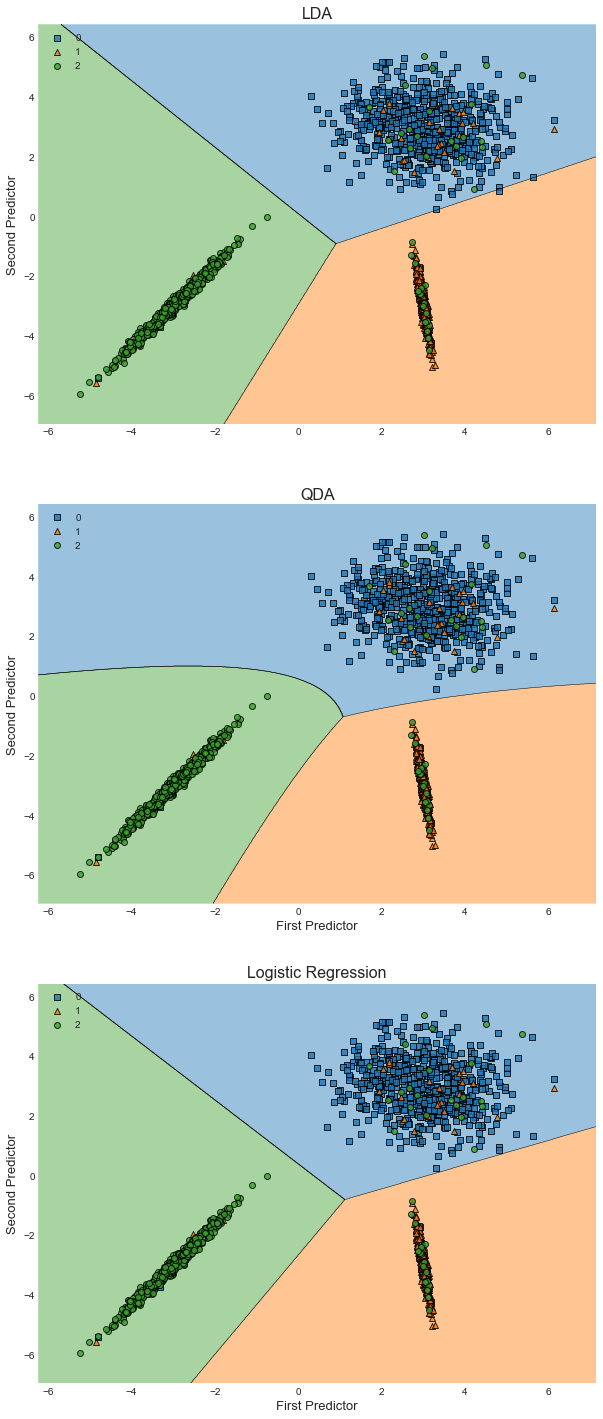

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (10, 25))

ax1 = plot_decision_regions(np.array(X), np.array(y), clf = lda_model, legend = 2, ax = ax1)
ax2.set_xlabel("First Predictor", fontsize = 13)
ax1.set_ylabel("Second Predictor", fontsize = 13)
ax1.set_title("LDA", fontsize = 16)
ax2 = plot_decision_regions(np.array(X), np.array(y), clf = qda_model, legend = 2, ax = ax2)
ax2.set_title("QDA", fontsize = 16)
ax2.set_xlabel("First Predictor", fontsize = 13)
ax2.set_ylabel("Second Predictor", fontsize = 13)
ax3 = plot_decision_regions(np.array(X), np.array(y), clf = logreg_model, legend = 2, ax = ax3)
ax3.set_title("Logistic Regression", fontsize = 16)
ax3.set_xlabel("First Predictor", fontsize = 13)
ax3.set_ylabel("Second Predictor", fontsize = 13)

plt.show()

In [25]:
logreg_pred = logreg_model.predict(X_test)
lda_pred = lda_model.predict(X_test)
qda_pred = qda_model.predict(X_test)

print("LogisticRegression")
print(classification_report(y_test, logreg_pred))
print("LDA")
print(classification_report(y_test, lda_pred))
print("QDA")
print(classification_report(y_test, qda_pred))

LogisticRegression
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       142
           1       0.92      0.91      0.91       124
           2       0.92      0.92      0.92       134

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400

LDA
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       142
           1       0.92      0.91      0.91       124
           2       0.92      0.92      0.92       134

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400

QDA
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       142
           1       0.92      0.91      0.91       124
           2       0.92      0.92      0.92     

In [26]:
logreg_proba = logreg_model.predict_proba(X_test)
lda_proba = lda_model.predict_proba(X_test)
qda_proba = qda_model.predict_proba(X_test)

logreg_auc = roc_auc_score(y_test, logreg_proba, multi_class = "ovr")
lda_auc = roc_auc_score(y_test, lda_proba, multi_class = "ovr")
qda_auc = roc_auc_score(y_test, qda_proba, multi_class = "ovr")

logreg_auc, lda_auc, qda_auc

(0.9339723690218342, 0.9344396595437439, 0.9335537189651584)

Based on AUC scores, LogisticRegression performs the best. For all other metrics, models work almost the same.

## Problem 3

In [27]:
X, y = make_classification(n_samples = 2000, 
                           n_features = 10,
                           n_redundant = 4,
                           n_informative = 6,
                           n_classes = 4)

In [28]:
data_3 = pd.DataFrame(data = np.c_[X, y])
data_3.columns = np.array(["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "Response"])
data_3.Response = pd.to_numeric(data_3.Response, downcast = "signed")
data_3.head()

,A,B,C,D,E,F,G,H,I,J,Response
0,0.475711,-1.346164,0.087925,-1.367790,-1.361559,-0.113313,-1.378241,0.471660,-1.075422,0.935436,2
1,-4.300851,1.193403,-1.502776,0.845787,-0.767908,-2.613736,3.772948,-2.289925,3.277760,1.270251,3
2,-3.658030,4.475488,2.215842,0.540767,-5.433301,-4.308730,-4.324747,-6.391209,-2.047587,-3.559950,1
3,2.402260,0.681434,0.103118,-0.251865,2.632048,0.806051,0.513050,-0.536373,0.663346,-0.335532,1
4,-2.105991,2.399383,1.663473,0.246629,-1.090936,-3.430238,-0.043079,-4.692875,1.288849,0.491704,1


In [29]:
X = data_3.drop(["Response"], axis = 1)
y = data_3.Response

X.shape, y.shape

((2000, 10), (2000,))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [31]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_model_train_score = logreg_model.score(X_train, y_train)
logreg_model_test_score = logreg_model.score(X_test, y_test)

print("Logistic Regression train score:", logreg_model_train_score)
print("Logistic Regression test score:", logreg_model_test_score)

Logistic Regression train score: 0.603125
Logistic Regression test score: 0.615


In [32]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
lda_model_train_score = lda_model.score(X_train, y_train)
lda_model_score = lda_model.score(X_test, y_test)

print("LDA model score:", lda_model_score)
print("LDA model train score:", lda_model_train_score)

LDA model score: 0.605
LDA model train score: 0.605


In [33]:
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
qda_model_train_score = qda_model.score(X_train, y_train)
qda_model_test_score = qda_model.score(X_test, y_test)

print("QDA model train score:", qda_model_train_score)
print("QDA model test score:", qda_model_test_score)

QDA model train score: 0.591875
QDA model test score: 0.5775
